# Spotify 2023 Dataset – Exploratory Data Analysis & Predictive Modeling

This project demonstrates an end-to-end data analysis workflow  
It includes:

- Dataset loading & inspection  
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature selection  
- Predictive modeling with Random Forest Regressor  
- Model evaluation  
- Feature importance interpretation  

---

## Importing Required Libraries
The following libraries are used for data manipulation, visualization, and machine learning.

---

## Loading the Dataset
The dataset is imported from the Kaggle input directory.  
Encoding is set to ensure cross-platform consistency.

---

## Initial Data Inspection
We examine dataset shape, column types, missing values, and summary statistics.

---

## Data Cleaning and Preprocessing
Text-formatted numerical columns are cleaned and converted into numerical types.  
Missing values are handled, and rows lacking the target variable are removed.

---

## Exploratory Data Analysis (EDA)
Visual analysis is conducted to understand distribution, correlations, and relationships:

- Distribution of `streams`  
- Correlation between playlist metrics and streams  
- Scatter plot showing playlist count vs. streaming performance  

---

## Feature Selection
Model features include:

- Release information  
- Playlist and chart counts  
- Audio attributes  

---

## Train/Test Split and Model Training
A Random Forest Regressor is trained to predict streaming performance.

---

## Model Evaluation
Model accuracy is assessed using R² score and Mean Absolute Error.

---

## Feature Importance Interpretation
We identify which features contribute most to the model’s predictions.

---

## Sample Predictions
Predicted and actual values for a subset of the test set are displayed for comparison.

---

## Conclusion
This workflow demonstrates practical data analysis and predictive modeling skills.  
It provides a strong foundation for extensions such as hyperparameter tuning or advanced models.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [5]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [6]:
#Load the Dataset
df = pd.read_csv("../input/top-spotify-songs-2023/spotify-2023.csv", encoding="latin-1")
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
#Initial Data Inspection
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns)
print("\nData Info:")
print(df.info())
df.describe().T


Dataset Shape: (953, 24)

Columns:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-nul

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [8]:
#Data Cleaning and Preprocessing
data = df.copy()

numeric_object_cols = ["streams", "in_deezer_playlists", "in_shazam_charts"]

for col in numeric_object_cols:
    data[col] = data[col].astype(str).str.replace(",", "", regex=False)
    data[col] = pd.to_numeric(data[col], errors="coerce")

data["in_shazam_charts"] = data["in_shazam_charts"].fillna(0)
data = data.dropna(subset=["streams"])

print("Shape After Cleaning:", data.shape)


Shape After Cleaning: (952, 24)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


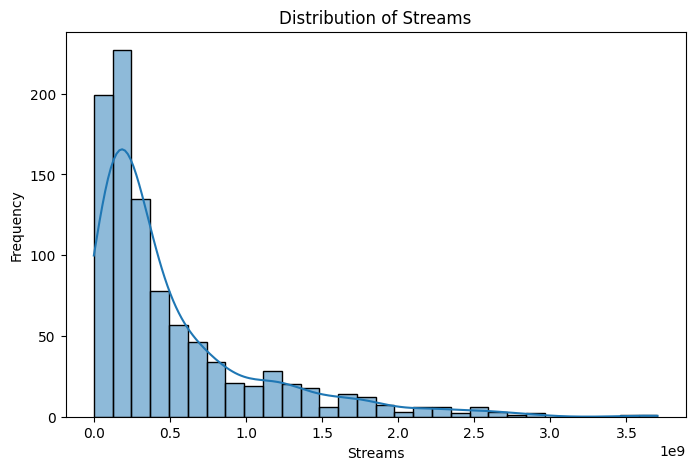

In [9]:
#EDA – Distribution of Streams
plt.figure(figsize=(8,5))
sns.histplot(data["streams"], bins=30, kde=True)
plt.title("Distribution of Streams")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()


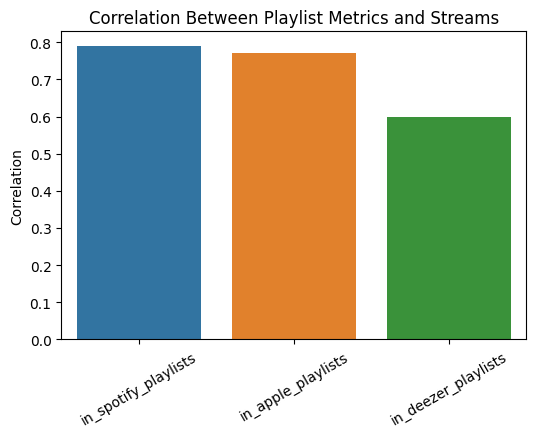

In [10]:
#EDA – Correlation Between Playlist Metrics and Streams
playlist_cols = [
    "in_spotify_playlists",
    "in_apple_playlists",
    "in_deezer_playlists"
]

corr_with_streams = data[["streams"] + playlist_cols].corr()["streams"]

plt.figure(figsize=(6,4))
sns.barplot(
    x=corr_with_streams.index[1:], 
    y=corr_with_streams.values[1:]
)
plt.title("Correlation Between Playlist Metrics and Streams")
plt.ylabel("Correlation")
plt.xticks(rotation=30)
plt.show()


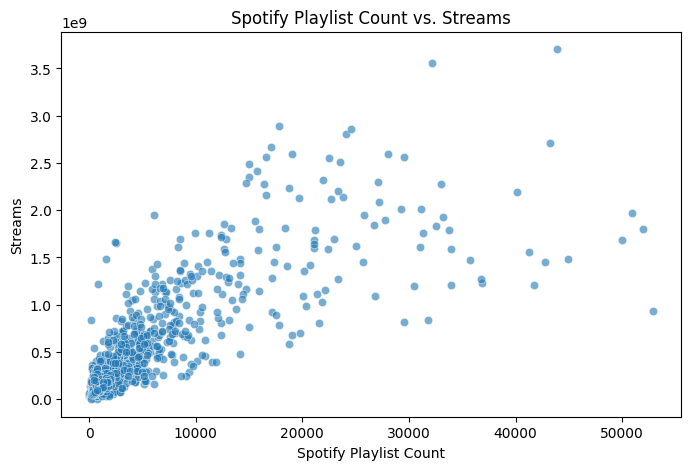

In [11]:
#EDA – Scatter Plot: Spotify Playlist Count vs Streams
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x="in_spotify_playlists",
    y="streams",
    alpha=0.6
)
plt.title("Spotify Playlist Count vs. Streams")
plt.xlabel("Spotify Playlist Count")
plt.ylabel("Streams")
plt.show()


In [12]:
#Feature Selection
feature_cols = [
    "artist_count",
    "released_year",
    "released_month",
    "released_day",
    "in_spotify_playlists",
    "in_spotify_charts",
    "in_apple_playlists",
    "in_apple_charts",
    "in_deezer_playlists",
    "in_deezer_charts",
    "in_shazam_charts",
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%"
]

X = data[feature_cols]
y = data["streams"]


In [13]:
#Train/Test Split & Model Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [14]:
#Model Evaluation
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.3f}")


MAE: 132,603,912
R² Score: 0.823


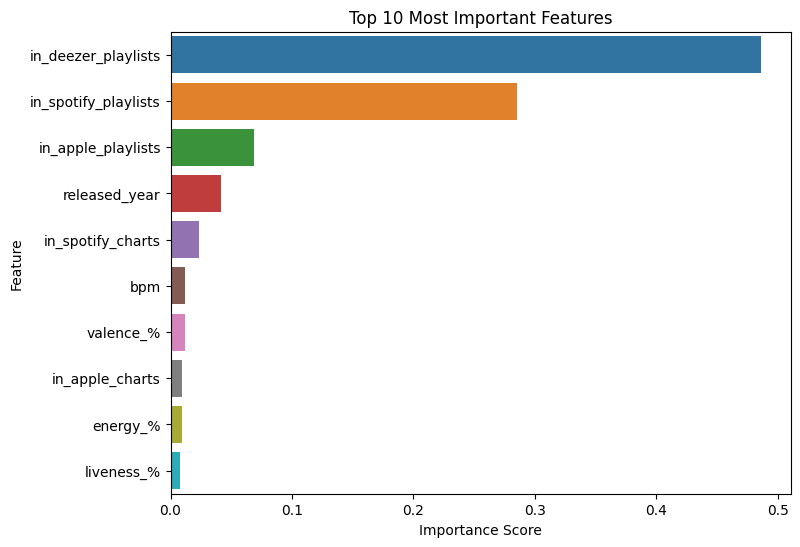

In [15]:
#Feature Importance Analysis
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_imp.head(10),
    x="importance",
    y="feature"
)
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [16]:
#Sample Predictions
comparison = pd.DataFrame({
    "Actual Streams": y_test.values[:10],
    "Predicted Streams": y_pred[:10].astype(int)
})

comparison


,Actual Streams,Predicted Streams
0,1.479115e+09,1457485794
1,7.848982e+07,267076919
2,1.439191e+09,1501981389
3,1.069331e+08,282278062
4,1.309887e+09,1577961108
5,5.939176e+08,656356830
6,3.020066e+08,220847530
7,8.636256e+08,429881563
8,8.555936e+07,187058545
9,1.435738e+08,126114351
